## Observations and Insights 

1. An almost even amount of males and females were used for this study.
2. Tumor size, on average decreased with time.
3. Capomulin was the most effective at reducing tumor size. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_data = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
total_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [21]:
# Checking the number of rows.
len(total_data.count(1, numeric_only="True"))

1893

In [28]:
#checking the number of mice
number_of_mice = total_data.groupby('Mouse ID')
count = number_of_mice['Mouse ID'].count()
len(count)

249

In [81]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice = total_data[total_data.duplicated(['Mouse ID'])]

dup_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
no_dp = total_data.drop_duplicates(subset='Mouse ID', keep='last')

no_dp

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [43]:
# Checking the number of mice in the clean DataFrame.
no_dp.count()


Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

## Summary Statistics

In [63]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen = total_data[['Drug Regimen','Tumor Volume (mm3)']]
regimen
tumor['Mean'] = regimen.groupby(['Drug Regimen']).mean().round(2)
tumor['Median'] = regimen.groupby(['Drug Regimen']).median().round(2)
tumor['Variance'] = regimen.groupby(['Drug Regimen']).var().round(2)
tumor['Standard Deviation'] = regimen.groupby(['Drug Regimen']).std().round(2)
tumor['SEM'] = regimen.groupby(['Drug Regimen']).sem().round(2)
tumor
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



,Tumor Volume (mm3),Median,Variance,Standard Deviation,SEM,Mean
Drug Regimen,,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33,40.68
Ceftamin,52.59,51.78,39.29,6.27,0.47,52.59
Infubinol,52.88,51.82,43.13,6.57,0.49,52.88
Ketapril,55.24,53.70,68.55,8.28,0.60,55.24
Naftisol,54.33,52.51,66.17,8.13,0.60,54.33
Placebo,54.03,52.29,61.17,7.82,0.58,54.03
Propriva,52.32,50.85,42.35,6.51,0.51,52.32
Ramicane,40.22,40.67,23.49,4.85,0.32,40.22
Stelasyn,54.23,52.43,59.45,7.71,0.57,54.23


In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen.describe()
# Using the aggregation method, produce the same summary statistics in a single line


,Tumor Volume (mm3)
count,1893.000000
mean,50.448381
std,8.894722
min,22.050126
25%,45.000000
50%,48.951474
75%,56.292200
max,78.567014


## Bar and Pie Charts

<AxesSubplot:title={'center':'Timepoints per Drug Regimen'}, xlabel='Drug Regimen', ylabel='Number of Timepoints'>

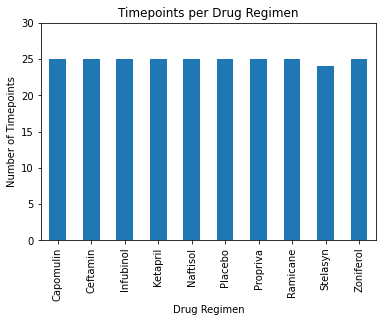

In [78]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tp_mice = no_dp.groupby('Drug Regimen')['Timepoint'].count()
plt.ylim(0,30)
plt.ylabel('Number of Timepoints')
plt.title('Timepoints per Drug Regimen')
tp_mice.plot(kind='bar')



<BarContainer object of 10 artists>

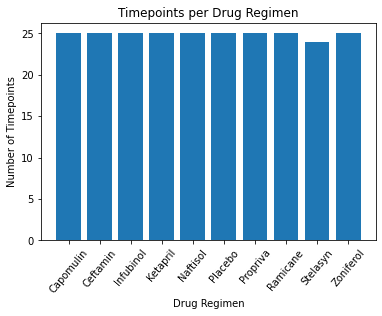

In [87]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
drugs = tp_mice.index.tolist()
x_axis = drugs
y_axis = tp_mice
plt.xlabel('Drug Regimen')
plt.xticks(rotation=50)
plt.ylabel('Number of Timepoints')
plt.title('Timepoints per Drug Regimen')
plt.bar(x_axis, y_axis)


<AxesSubplot:ylabel='Mouse ID'>

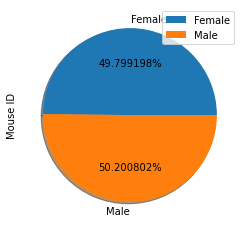

In [130]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = no_dp.groupby('Sex').count()
male_female = sex[['Mouse ID']]
sex
male_female.plot.pie(y='Mouse ID', shadow=True, autopct="%1F%%")


In [139]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex =  no_dp.groupby('Sex').count()
lables = ['Male', 'Female']
male_female = sex[['Mouse ID']]
sex.plt.pie[male_female]


AttributeError: 'DataFrame' object has no attribute 'plt'

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

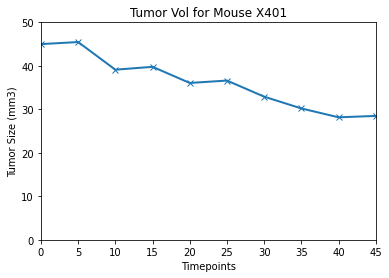

In [123]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lines=total_data.loc[total_data['Mouse ID']=='x401']
x_axis=lines['Timepoint']
y_axis=lines['Tumor Volume (mm3)']
line=plt.plot(x_axis, y_axis, linewidth=2, marker='x')
plt.xlim(0,45)
plt.ylim(0,50)
plt.title('Tumor Vol for Mouse X401')
plt.xlabel('Timepoints')
plt.ylabel('Tumor Size (mm3)')
plt.show()


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mice_weight=




## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
